# This file computes syntactic complexity measures and bert embeddings for all essays in the ASAP #2 dataset, and builds a classification model to score the essays.
## Import library

In [1]:
%run functions

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load data

In [17]:
loader = DataLoader()
d = loader.GetData('ASAP')
for i in range(1,9):
    print(len(d.loc[d['essay_set'] ==i]))

1783
1800
1726
1772
1805
1800
1569
723


## Extract embeddings
+ takes 19m27.4s on my computer in total
+ For performance reasons (out of memory), the dataset had to be processed in batches

In [10]:
def GetEmbeddings(data):
    maxind = len(data)
    xc = []
    xp = []
    for i in range(0,maxind,1000):
        if i +1000 > maxind:
            end = maxind
        else:
            end = i+1000
        EmbeddingFetcher = GetBERTEmbeddings(d['essay'][i:end],'model/deberta-v3-large')
        EmbeddingFetcher.inf(stop=1000,SeqLen = 512)
        xp += EmbeddingFetcher.GetEmbeddings('MeanP')
        xc += EmbeddingFetcher.GetEmbeddings('CLS')
        del EmbeddingFetche
        che()
    return (xp,xc)
for i in range(2,9):
    data = d.loc[d['essay_set'] ==i]
    res = GetEmbeddings(data)
    torch.save(res[1],'features/asap-{}-cls.pt'.format(i))
    torch.save(res[0],'features/asap-{}-meanp.pt'.format(i))

tokenized


c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\models\deberta_v2\modeling_deberta_v2.py:745: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_scores = torch.bmm(query_layer, key_layer.transpose(-1, -2)) / torch.tensor(
c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\models\deberta_v2\modeling_deberta_v2.py:829: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  score += c2p_att / torch.tensor(scale, dtype=c2p_att.dtype)
c:\Users\Administrator\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\models\deberta_v2\modeling_deberta_v2.py:852: UserWarning: To copy construct from a te

0/1000, run:0
10/1000, run:0
20/1000, run:0
30/1000, run:0
40/1000, run:0
50/1000, run:0
60/1000, run:0
70/1000, run:0
80/1000, run:0
90/1000, run:0
100/1000, run:0
110/1000, run:0
120/1000, run:0
130/1000, run:0
140/1000, run:0
150/1000, run:0
160/1000, run:0
170/1000, run:0
180/1000, run:0
190/1000, run:0
200/1000, run:0
210/1000, run:0
220/1000, run:0
230/1000, run:0
240/1000, run:0
250/1000, run:0
260/1000, run:0
270/1000, run:0
280/1000, run:0
290/1000, run:0
300/1000, run:0
310/1000, run:0
320/1000, run:0
330/1000, run:0
340/1000, run:0
350/1000, run:0
360/1000, run:0
370/1000, run:0
380/1000, run:0
390/1000, run:0
400/1000, run:0
410/1000, run:0
420/1000, run:0
430/1000, run:0
440/1000, run:0
450/1000, run:0
460/1000, run:0
470/1000, run:0
480/1000, run:0
490/1000, run:0
500/1000, run:0
510/1000, run:0
520/1000, run:0
530/1000, run:0
540/1000, run:0
550/1000, run:0
560/1000, run:0
570/1000, run:0
580/1000, run:0
590/1000, run:0
600/1000, run:0
610/1000, run:0
620/1000, run:0
630

### Save feature to disk

In [48]:
torch.save(xc,'features/asap-cls.pt')
torch.save(xp,'features/asap-meanp.pt')

## Fine-grained complexity features

In [27]:
for i in range(10599,len(d)):
    t = d['essay'][i]
    if len(t) > 2:
        extractor = FeatureExtraction(t)
        extractor.process()
        features = extractor.get_data()
        with open('features/asap-fine.csv','a',encoding='utf-8') as f:
            f.write('{}, '.format(i))
            f.write(','.join([str(i) for i in features]))
            f.write('\n')
    else:
        with open('features/asap-fine.csv','a',encoding='utf-8') as f:
            f.write('{},'.format(i))
            f.write('\n')
    del extractor
    print(i)

c:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\rnn.py:28: UserWarning: apply_permutation is deprecated, please use tensor.index_select(dim, permutation) instead
  warnings.warn("apply_permutation is deprecated, please use tensor.index_select(dim, permutation) instead")


10599
10600
10601
10602
10603
10604
10605
10606
10607
10608
10609
10610
10611
10612
10613
10614
10615
10616
10617
10618
10619
10620
10621
10622
10623
10624
10625
10626
10627
10628
10629
10630
10631
10632
10633
10634
10635
10636
10637
10638
10639
10640
10641
10642
10643
10644
10645
10646
10647
10648
10649
10650
10651
10652
10653
10654
10655
10656
10657
10658
10659
10660
10661
10662
10663
10664
10665
10666
10667
10668
10669
10670
10671
10672
10673
10674
10675
10676
10677
10678
10679
10680
10681
10682
10683
10684
10685
10686
10687
10688
10689
10690
10691
10692
10693
10694
10695
10696
10697
10698
10699
10700
10701
10702
10703
10704
10705
10706
10707
10708
10709
10710
10711
10712
10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
1076

In [15]:
for num in range(8170,8180):
    doc = NLP(d['essay'][num])
    sents = [j for j in doc.sents if len([i for i in str(j).split() if i.isalpha()]) > 3]  
    sentlen = []
    if len(sents) == 0:
        continue
    for s in sents:
        sentlen.append(len(str(s).split()))
    print(max(sentlen),len(sents))
    if max(sentlen) > 130:
        for l in range(len(sents)):
            if sentlen[l] == max(sentlen):
                print(num,max(sentlen),sents[l])

32 6
24 16
41 5
40 12
22 11
80 6
28 3
28 5
31 12
54 3


In [18]:
for num in range(8170,8180):
    doc = NLP(d['essay'][num])
    sents = [j for j in doc.sents if len([i for i in str(j).split() if i.isalpha()]) > 3]  
    self_sim = [1 for i in range(len(sents))] 
    sim_matrix= np.eye(len(sents),len(sents))
    for i in range(len(sents)):
        self_sim[i] = PartialTreeKernel(sents[i],sents[i])
        if self_sim[i] == 0:
            self_sim[i] = 1
    for i in range(len(sents)):
        for j in range(i+1,len(sents)):
            sim_matrix[i,j] = PartialTreeKernel(sents[i],sents[j])/math.sqrt(self_sim[i]*self_sim[j])
    print(num)

8170
8171
8172
8173
8174
8175
8176
8177
8178
8179


In [26]:
sim_list = []
ind = [i for i in d.index if d['essay_set'][i] == 8]
for num in ind:
    doc = NLP(d['essay'][num])
    sents = [j for j in doc.sents if len([i for i in str(j).split() if i.isalpha()]) > 3]  
    self_sim = [1 for i in range(len(sents))] 
    sim_matrix= np.eye(len(sents),len(sents))
    for i in range(len(sents)):
        self_si
        
        
        m[i] = PartialTreeKernel(sents[i],sents[i])
        if self_sim[i] == 0:
            self_sim[i] = 1
    for i in range(len(sents)):
        for j in range(i+1,len(sents)):
            sim_matrix[i,j] = PartialTreeKernel(sents[i],sents[j])/math.sqrt(self_sim[i]*self_sim[j])
    if num % 10 == 0:  

        print(num)
        sim_list.append(sim_matrix)

12260
12270
12280
12290
12300
12310
12320
12330
12340
12350
12360
12370
12380
12390
12400
12410
12420
12430
12440
12450
12460
12470
12480
12490
12500
12510
12520
12530
12540
12550
12560
12570
12580
12590
12600
12610
12620
12630
12640
12650
12660
12670
12680
12690
12700
12710
12720
12730
12740
12750
12760
12770
12780
12790
12800
12810
12820
12830
12840
12850
12860
12870
12880
12890
12900
12910
12920
12930
12940
12950
12960
12970


In [27]:
np.savez('features/asap-8-sim.npz',*sim_list)

## Classification model
### Prepare train and test data

In [49]:
from sklearn.preprocessing import LabelEncoder
xec= [np.array(i).reshape(1024) for i in xc] # cls embeddings
xep= [np.array(i).reshape(1024) for i in xp] # mean pooling embeddings
le = LabelEncoder()
le.fit(d['domain1_score'])
y = le.transform(d['domain1_score']) 
TrainY,TestY = y[:1400],y[1400:]

### Classification with CLS token

In [22]:
TrainX,TestX = np.array(xec[:1400]),np.array(xec[1400:])

In [28]:
model = xgb.XGBClassifier(tree_method="hist",objective='multi:softmax',num_class=6,learning_rate=0.03)
model.fit(TrainX,TrainY)
PredY = model.predict(TestX)
print(accuracy_score(TestY,PredY))
print(cohen_kappa_score(TestY,PredY,weights='quadratic'))

0.67
0.6561814191660571


Text(50.722222222222214, 0.5, 'True Label')

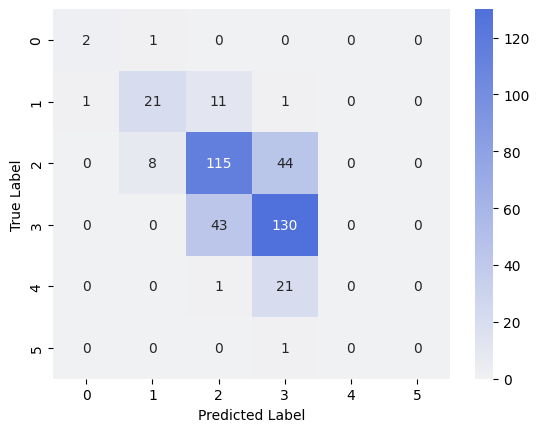

In [29]:
c = sns.light_palette((260, 75, 50),input = 'husl', as_cmap=True)
cm = confusion_matrix(TestY,PredY)
g = sns.heatmap(cm,annot=True,fmt='d',cmap=c)
g.set_xlabel('Predicted Label')
g.set_ylabel('True Label')

### Classification with mean pooling

In [50]:
TrainX,TestX = np.array(xep[:1400]),np.array(xep[1400:])

In [53]:
model = xgb.XGBClassifier(tree_method="hist",objective='multi:softmax',num_class=6,learning_rate=0.03)
model.fit(TrainX,TrainY)
PredY = model.predict(TestX)
print(accuracy_score(TestY,PredY))
print(cohen_kappa_score(TestY,PredY,weights='quadratic'))

0.6625
0.6298241008138619


Text(50.722222222222214, 0.5, 'True Label')

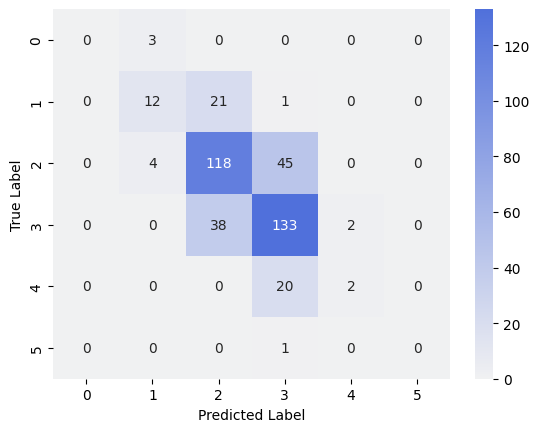

In [54]:
c = sns.light_palette((260, 75, 50),input = 'husl', as_cmap=True)
cm = confusion_matrix(TestY,PredY)
g = sns.heatmap(cm,annot=True,fmt='d',cmap=c)
g.set_xlabel('Predicted Label')
g.set_ylabel('True Label')

### Classification with fine-grained complexity measures

In [57]:
xf = []
with open('features/asap-fine.csv') as f:
    for l in f.readlines():
        feat = [float(i) for i in l.split(',')[1:]]
        xf.append(feat)

In [60]:
TrainX,TestX = np.array(xf[:1400]),np.array(xf[1400:])

In [61]:
model = xgb.XGBClassifier(tree_method="hist",objective='multi:softmax',num_class=6,learning_rate=0.03)
model.fit(TrainX,TrainY)
PredY = model.predict(TestX)
print(accuracy_score(TestY,PredY))
print(cohen_kappa_score(TestY,PredY,weights='quadratic'))

0.685
0.6880650994575046


Text(50.722222222222214, 0.5, 'True Label')

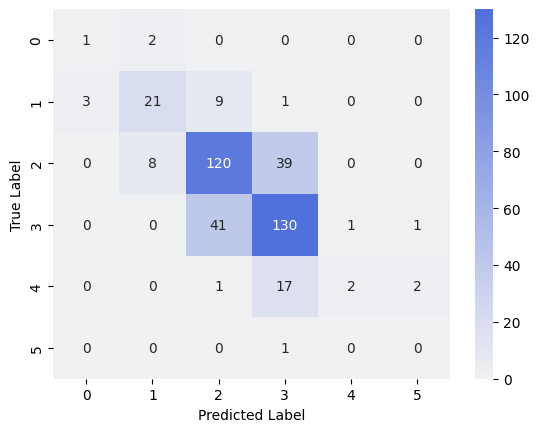

In [62]:
c = sns.light_palette((260, 75, 50),input = 'husl', as_cmap=True)
cm = confusion_matrix(TestY,PredY)
g = sns.heatmap(cm,annot=True,fmt='d',cmap=c)
g.set_xlabel('Predicted Label')
g.set_ylabel('True Label')

### Classification with cls + fine-grained measures

In [64]:
xcf = []
for i in range(1800):
    a = np.concatenate((xec[i],xf[i]))
    xcf.append(a)
TrainX,TestX = xcf[:1400],xcf[1400:]

In [65]:
model = xgb.XGBClassifier(tree_method="hist",objective='multi:softmax',num_class=6,learning_rate=0.03)
model.fit(TrainX,TrainY)
PredY = model.predict(TestX)
print(accuracy_score(TestY,PredY))
print(cohen_kappa_score(TestY,PredY,weights='quadratic'))

0.6825
0.6821983273596177


Text(50.722222222222214, 0.5, 'True Label')

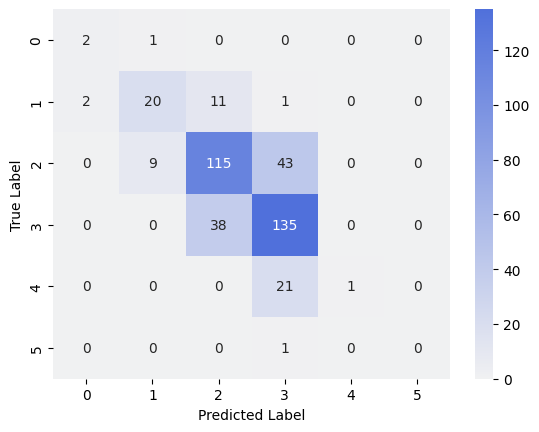

In [66]:
c = sns.light_palette((260, 75, 50),input = 'husl', as_cmap=True)
cm = confusion_matrix(TestY,PredY)
g = sns.heatmap(cm,annot=True,fmt='d',cmap=c)
g.set_xlabel('Predicted Label')
g.set_ylabel('True Label')